In [1]:
import numpy as np
import pandas as pd

In [3]:
traindf=pd.read_csv('train.csv')
testdf=pd.read_csv('test.csv')
featuresdf=pd.read_csv('features.csv')
storesdf=pd.read_csv('stores.csv')

In [4]:
traindf.shape

(139088, 5)

In [5]:
testdf.shape

(115064, 4)

In [6]:
featuresdf.shape

(8190, 12)

In [7]:
storesdf.shape

(45, 3)

In [8]:
traindf1=traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left')

In [9]:
traindf1.shape

(139088, 17)

In [10]:
traindf1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [11]:
traindf2=traindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [12]:
traindf2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [13]:
# remove outliers if any
traindf2.loc[traindf2['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
135917,14,78,2011-12-23,0.00,False,42.27,3.389,188.929975,8.523,both,A,200898
137779,14,96,2012-01-06,-19.02,False,35.88,3.422,189.194056,8.424,both,A,200898
137782,14,96,2012-03-23,-4.99,False,59.45,3.900,190.536321,8.424,both,A,200898
138088,14,99,2011-09-16,-30.00,False,69.17,3.742,186.802400,8.625,both,A,200898


In [14]:
traindf3=traindf2.loc[traindf2['Weekly_Sales']>0]
traindf4=traindf3.drop(['_merge'],axis=1)

In [15]:
traindf4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
94474,10,56,2010-02-05,1780.65,False,54.34,2.962,126.442065,9.765,B,126512
94617,10,58,2010-02-05,2356.00,False,54.34,2.962,126.442065,9.765,B,126512
94760,10,59,2010-02-05,2601.42,False,54.34,2.962,126.442065,9.765,B,126512
94903,10,60,2010-02-05,563.20,False,54.34,2.962,126.442065,9.765,B,126512
...,...,...,...,...,...,...,...,...,...,...,...
94616,10,56,2012-10-26,775.17,False,70.50,4.301,131.193097,6.943,B,126512
73453,8,34,2012-10-26,7032.21,False,64.74,3.506,227.036936,5.124,A,155078
14503,2,31,2012-10-26,3263.14,False,69.79,3.506,223.078337,6.170,A,202307
126177,13,81,2012-10-26,32497.21,False,46.97,3.755,131.193097,5.621,A,219622


In [16]:
traindf4['Type'].unique()

array(['A', 'B'], dtype=object)

ValueError: ignored

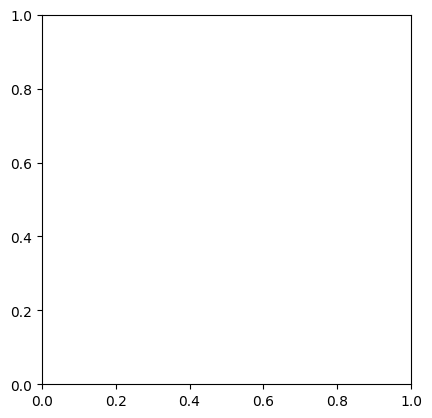

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
stores = ['Type A','Type B','Type C']

data = traindf4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()


In [19]:
traindf4['year'] = pd.DatetimeIndex(traindf4['Date']).year

<ipython-input-24-e503583668f8>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-24-e503583668f8>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   

              Fuel_Price       CPI  Unemployment      Size      year  
Store           0.065321 -0.211261      0.208759 -0.182763  0.002831  
Dept            0.003544 -0.007178      0.0

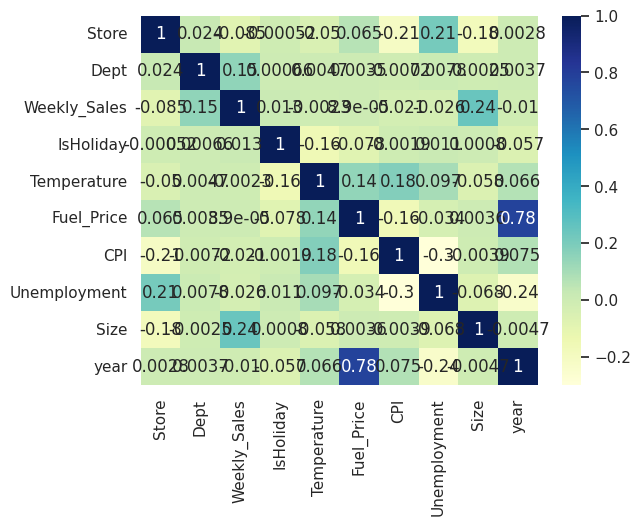

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = traindf4

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [ ]:
print(traindf4.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int64
dtype: object


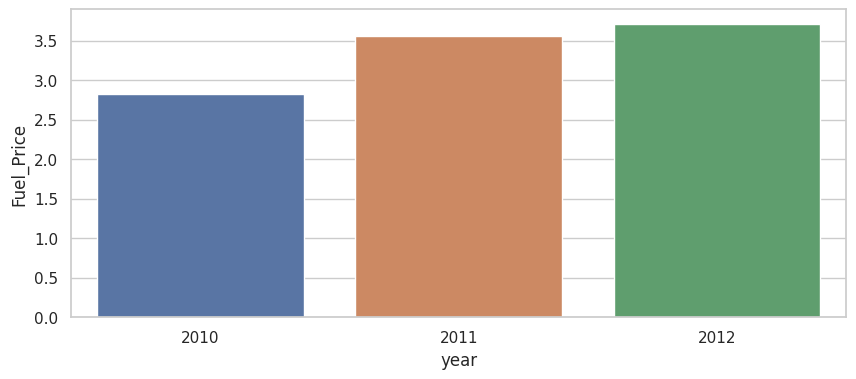

In [ ]:
# Graph of year vs fuel price
import seaborn as sns
sns.set_theme(style="whitegrid")
tips =traindf4
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

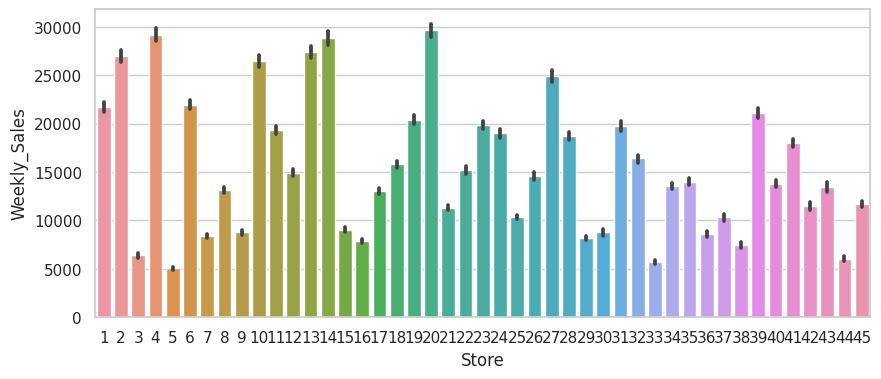

In [ ]:
# weekly sale vs Store
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

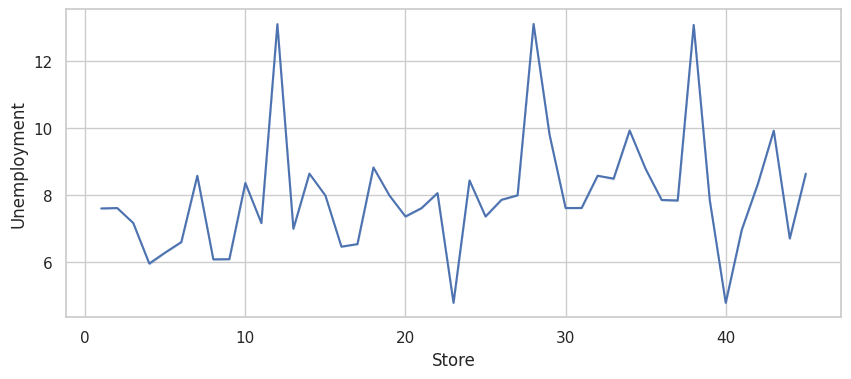

In [ ]:
# Store vs Unemployment
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = traindf4

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()

In [ ]:
traindf4['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

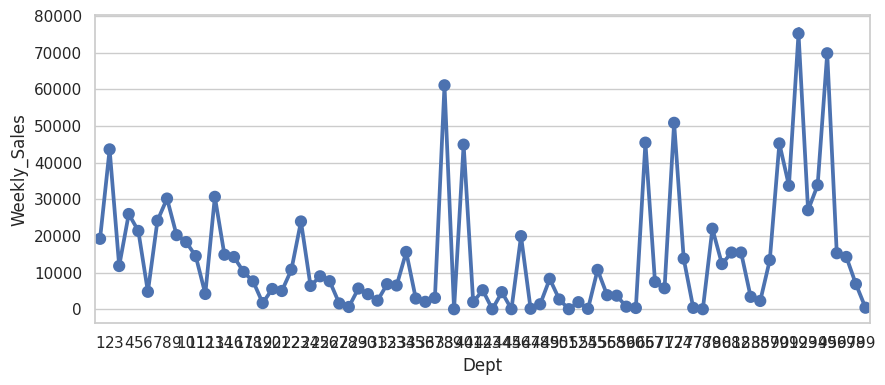

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data =traindf4

# draw pointplot
sns.pointplot(x ='Dept',
			y = "Weekly_Sales",
			data = data)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

In [ ]:
traindf4['month'] = pd.DatetimeIndex(traindf4['Date']).month

In [ ]:
traindf4['week'] = pd.DatetimeIndex(traindf4['Date']).week

<ipython-input-34-5de7f5a0eeb5>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  traindf4['week'] = pd.DatetimeIndex(traindf4['Date']).week


In [ ]:
traindf5=traindf4.drop(['Date'],axis=1)

<Axes: xlabel='month'>

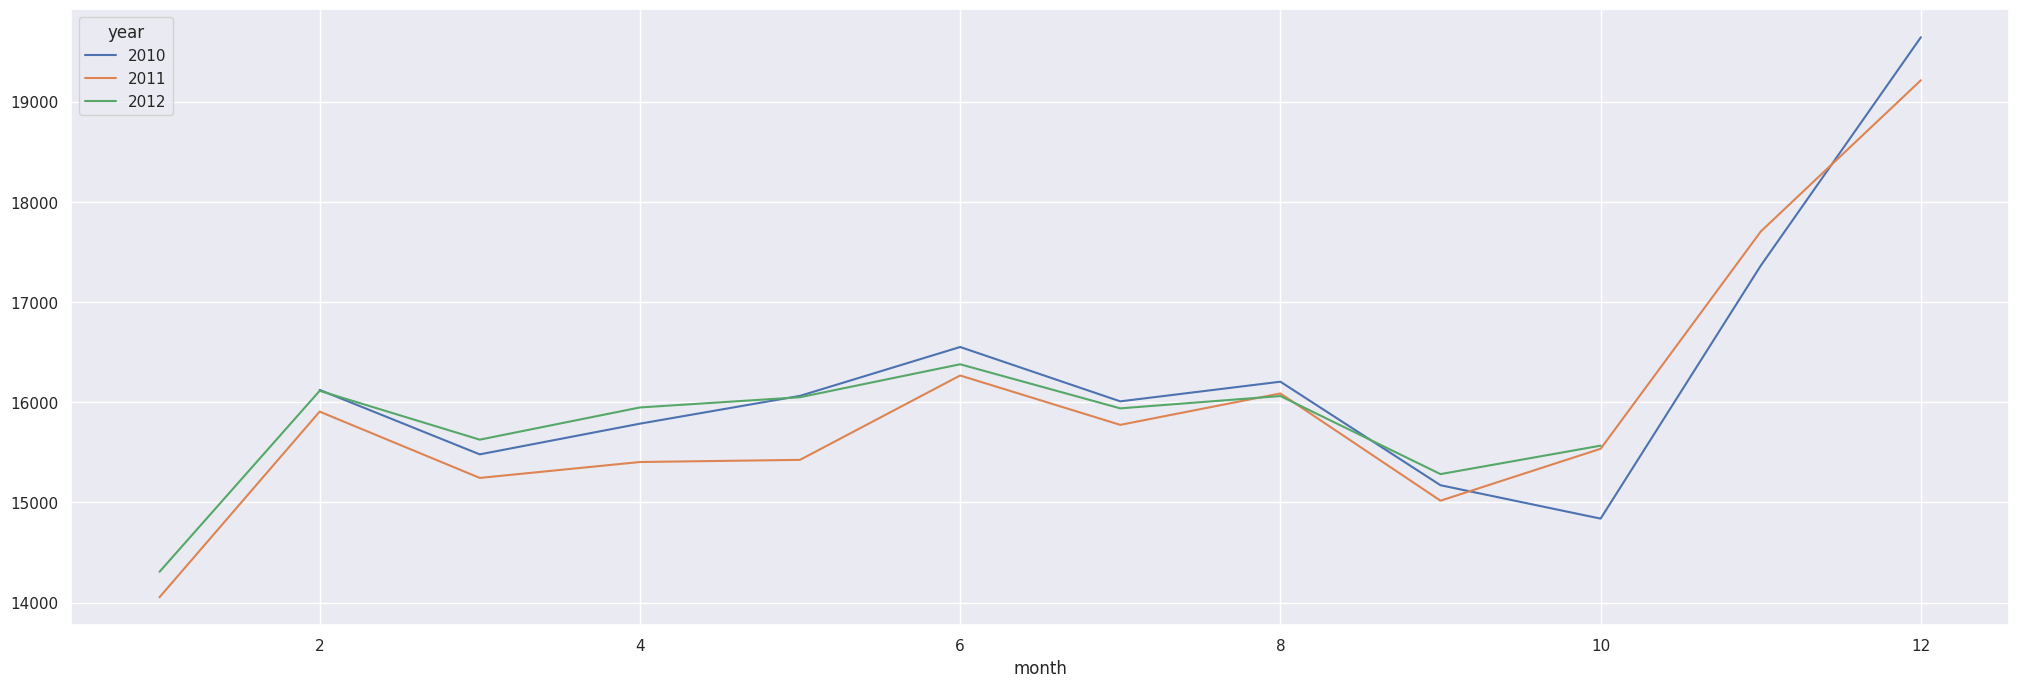

In [ ]:
month_wise_sales = pd.pivot_table(traindf5, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()